In [10]:
import pickle
import json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def cumulativeGoodCandidates(ranking):
    cumulative = []
    n_good_candidates = 0
    
    for index, ranked_user in ranking.iterrows():
        if ranked_user['good'] == True:
            n_good_candidates = n_good_candidates + 1
        cumulative.append(n_good_candidates)
        
    return np.array(cumulative)

In [18]:
def averageRankPos(ranking, avg_rank):
    for index, candidate in ranking.iterrows():
        username = candidate[0]
        try:
            avg_rank[username].append(index+1)
        except:
            # initialization
            avg_rank[username] = [index+1]

In [3]:
allseeds = list(map(str, pd.read_csv('../data-seed/finance_20/user.csv', sep='\t')['screen_name']))
combinations = json.load(open('combinations.json', 'rb'))

In [15]:
content_ranking = pickle.load(open('../../fingerprints/finance_complete_vocabulary.pkl' , 'rb'))
context_ranking = json.load(open('finance_ranking_cosine.json', 'rb'))
agg_ranking = json.load(open('finance_ranking_agg_median.json', 'rb'))

P@10: 5.64


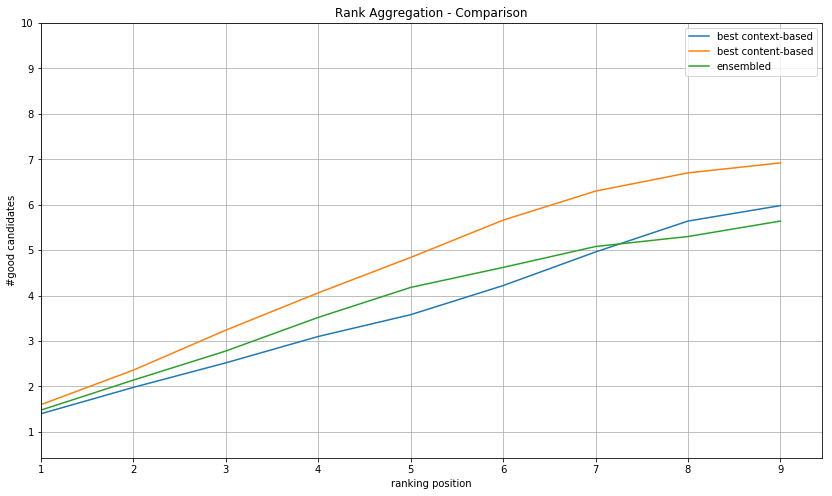

In [19]:
avg_r_ct = {}
avg_r_cx = {}
avg_r_agg = {}

ensemble_p10 = 0

ysum_agg = 0
ysum_content = 0
ysum_context = 0
for i in range(50):
    good_candidates = set(set(allseeds)-(set(combinations[str(i)])))
    
    context_r = pd.DataFrame(context_ranking[str(i)])
    content_r = pd.DataFrame(content_ranking[i])
    agg_r = pd.DataFrame(agg_ranking[str(i)])
    
    context_r['good'] = context_r.apply(lambda x: True if x[0] in good_candidates else False, axis=1)
    content_r['good'] = content_r.apply(lambda x: True if x[0] in good_candidates else False, axis=1)
    agg_r['good'] = agg_r.apply(lambda x: True if x[0] in good_candidates else False, axis=1)
    
    averageRankPos(context_r, avg_r_cx)
    averageRankPos(content_r, avg_r_ct)
    averageRankPos(agg_r, avg_r_agg)
            
    y_agg = cumulativeGoodCandidates(agg_r)
    y_content = cumulativeGoodCandidates(content_r)
    y_context = cumulativeGoodCandidates(context_r)
    
    ysum_agg += y_agg
    ysum_content += y_content
    ysum_context += y_context
    
    ensemble_p10 += y_agg[9]
    
print ('P@10:', ensemble_p10/50)

ensemble = ysum_agg.astype(float)/50
best_content = ysum_content.astype(float)/50
best_context = ysum_context.astype(float)/50

K = 10
plt.figure(figsize=(14,8))
plt.title('Rank Aggregation - Comparison')
plt.ylabel('#good candidates')
plt.xlabel('ranking position')

plt.plot(best_context[:K], label='best context-based')
plt.plot(best_content[:K], label='best content-based')
plt.plot(ensemble[:K], label='ensembled')

# plt.plot([0, len(ensemble)],[0, 10], linestyle='--', color='black')
plt.xlim(xmin=1)
plt.legend()
plt.yticks(range(1,11))
plt.grid(True)

### Content average ranking

In [21]:
res = []
for u in avg_r_ct:
    res.append(tuple((u, np.mean(avg_r_ct[u]))))

In [26]:
content_df = pd.DataFrame(res, columns=['username', 'average_ranking']).sort_values(by='average_ranking')
content_df['community'] = content_df['username'].apply(lambda x: True if x in allseeds else False)
content_df[:20]

,username,average_ranking,community
0,economistmeg,1.384615,True
1,dsquareddigest,2.384615,True
97,firoozye,3.450000,True
96,faulljonathan,3.620690,True
105,queen_europe,3.857143,True
3,rencapman,4.590909,True
2,adam,4.700000,False
99,ezraklein,5.625000,True
5,lamonicabuzz,6.291667,True
102,katie_martin_fx,6.692308,True


### Context average ranking

In [27]:
res = []
for u in avg_r_cx:
    res.append(tuple((u, np.mean(avg_r_cx[u]))))

In [28]:
context_df = pd.DataFrame(res, columns=['username', 'average_ranking']).sort_values(by='average_ranking')
context_df['community'] = context_df['username'].apply(lambda x: True if x in allseeds else False)
context_df[:20]

,username,average_ranking,community
0,economistmeg,1.384615,True
3,reinman_mt,2.000000,True
2,jodopod,3.200000,False
1,rencapman,3.818182,True
166,economisthulk,3.842105,True
167,katie_martin_fx,4.884615,True
7,guzzishoes,4.940000,False
160,faulljonathan,5.103448,True
8,chrisfralic,5.780000,False
5,fgoria,6.333333,True


### Aggregate average ranking

In [29]:
res = []
for u in avg_r_agg:
    res.append(tuple((u, np.mean(avg_r_agg[u]))))

In [30]:
agg_df = pd.DataFrame(res, columns=['username', 'average_ranking']).sort_values(by='average_ranking')
agg_df['community'] = agg_df['username'].apply(lambda x: True if x in allseeds else False)
agg_df[:20]

,username,average_ranking,community
0,economistmeg,1.000000,True
1,rencapman,2.500000,True
3,guzzishoes,2.660000,False
96,faulljonathan,3.068966,True
125,queen_europe,3.607143,True
116,katie_martin_fx,4.576923,True
2,fgoria,4.761905,True
100,ezraklein,7.125000,True
6,laurenlacapra,7.136364,True
4,justinwolfers,7.833333,True


In [35]:
compare = context_df[context_df['community'] == True].merge(content_df[content_df['community'] == True], on='username')
compare = compare.drop(['community_x', 'community_y'], axis=1)
compare.columns = ['username', 'rank_context', 'rank_content']
compare

,username,rank_context,rank_content
0,economistmeg,1.384615,1.384615
1,reinman_mt,2.000000,46.300000
2,rencapman,3.818182,4.590909
3,economisthulk,3.842105,90.684211
4,katie_martin_fx,4.884615,6.692308
5,faulljonathan,5.103448,3.620690
6,fgoria,6.333333,8.238095
7,queen_europe,6.571429,3.857143
8,justinwolfers,6.766667,12.166667
9,laurenlacapra,8.454545,9.136364
